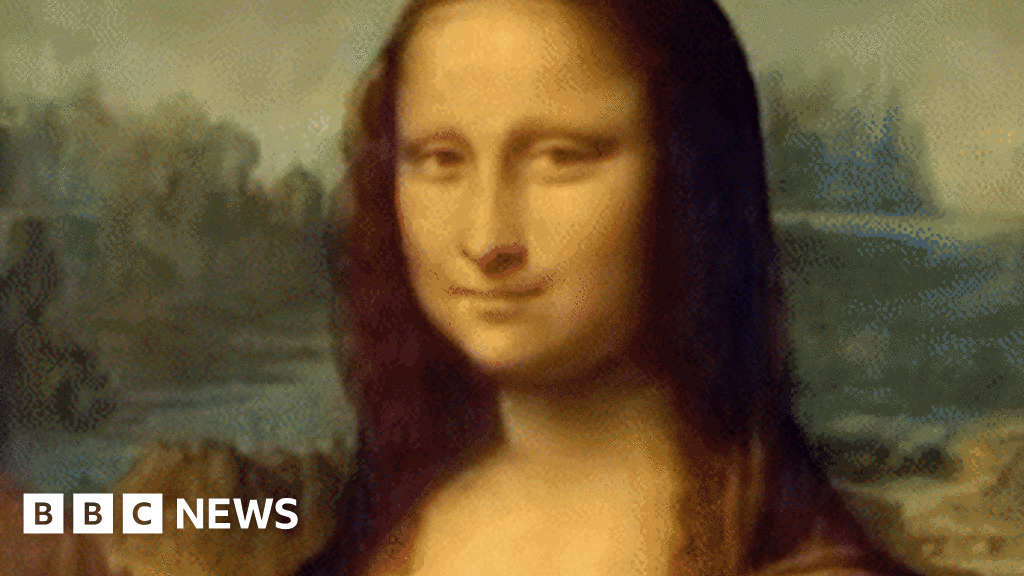

In [1]:
import PIL
from PIL import Image
from IPython.display import display
file="monalisa.gif"
image=Image.open(file).convert('RGB')

display(image)

> Change the brightness of the image in ten different ways, then scale the image down smaller, and put them side by side so we can get the sense of which brightness we might wnat to use.

In [2]:
from PIL import ImageEnhance

enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0,10):
    # Divide i by ten to get the decimal value we want, and append it to the images list
    images.append(enhancer.enhance(i/10))
# The results here is a list of then PIL.Image.Image objects.
# Jupyter nicely prints out the value of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664B3C70>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBC10>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBD00>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBC70>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBCA0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBCD0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBD90>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBDC0>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBE20>, <PIL.Image.Image image mode=RGB size=1024x576 at 0x1BB664CBE50>]


In [3]:
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB or HSV images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



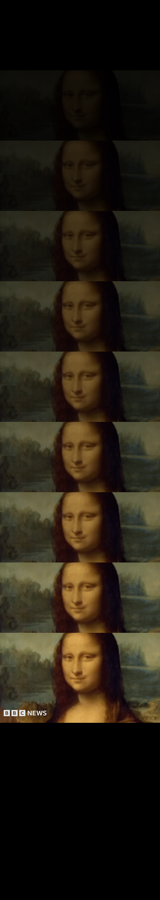

In [4]:
# Use the mode 'RGB' which stands for Red, Green, and Blue, and is the modr of our current first image.
# For the size we have a tuple, which is the width fo the image and the height.
first_image=images[0]
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

# So now we have a black image that's n times the size of the other images in the contact_Sheet
current_location = 0
for img in images:
    contact_sheet.paste(img, (0, current_location))
    current_location=current_location+450
    
# Just resize this sheet for display.
contact_sheet = contact_sheet.resize((160,900) )
display(contact_sheet)

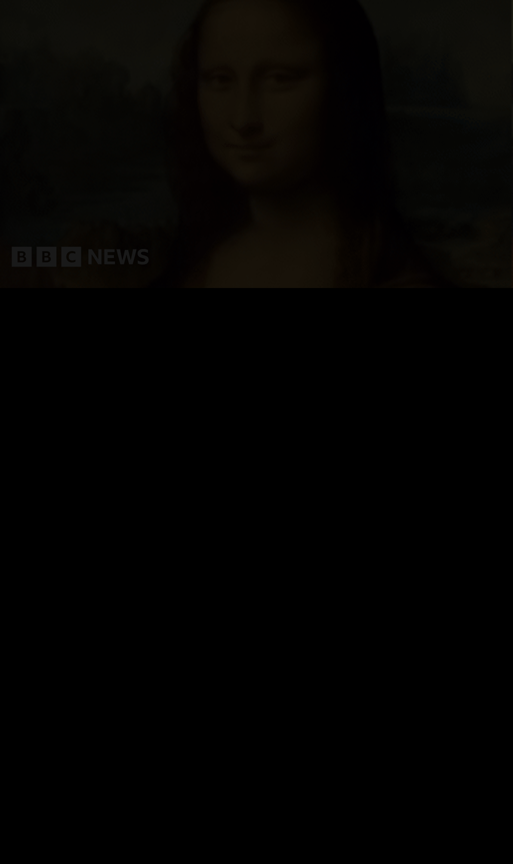

In [5]:
# Change this to a three by three grid of values.
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width+3,first_image.height*3))

# In PIL we manage the location of where we refer to as an image in the upper right hadn corner, so this will be 0,0.
x=0
y=0

# Iterate over our images. Except, we don't want to both with the first one, 
# because it is just solid black. Instead we want to jsut deal with the images after the first one, and that should give us nine in total
for img in images[1:]:
    contact_sheet.paste(img, (x, y) )
    # Update X position. If it is going to be the width of the image, then we set it to 0
    # Update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width
        
# Resize the contact sheet. 
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

> ^ It should be 3*3 images

http://pillow.readthedocs.io/en/stable/

Do some Image Manipulation and Color Channels